# Khai thác dữ liệu_Lab06
## 21110414_Phan Hồng Trâm


# Bài 1: Thuật toán K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
blobs = pd.read_csv('data.csv')
colnames= list(blobs.columns[1:-1])
blobs = blobs.head(59)
blobs.head()

,ID,x,y,cluster
0,1.0,35.190,12.189,1.0
1,2.0,26.288,41.718,2.0
2,3.0,0.376,15.506,0.0
3,4.0,26.116,3.963,1.0
4,5.0,25.893,31.515,2.0


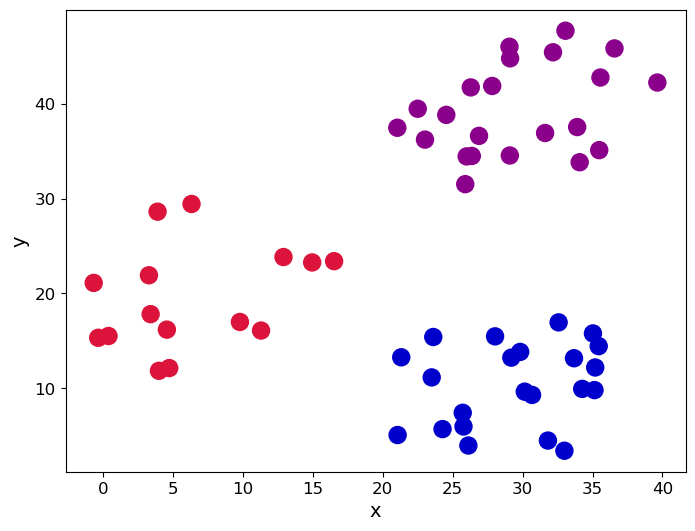

In [3]:
customcmap = ListedColormap(['crimson', 'mediumblue', 'darkmagenta'])
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(x= blobs['x'], y= blobs['y'], s= 150,
            c= blobs['cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

### Bước 1 và 2: Xác định k và khởi tạo các tâm

In [4]:
def intiate_centroids(k, dset):
  '''
  Select k data points as centroids
  k: number of centroids
  dset: pandas dataframe
  '''
  centroids = dset.sample(k)
  return centroids

np.random.seed(42)
k = 3
df = blobs[['x','y']]
centroids = intiate_centroids(k, df)
centroids

,x,y
0,35.190,12.189
5,23.606,15.402
34,23.492,11.142


### Bước 3: tính khoảng cách

In [5]:
def rsserr(a,b):
  '''
  Calculate sum of square errors
  a and b are numpy arrays
  '''
  return np.sum(np.square(a-b))

In [6]:
for i, centroid in enumerate(range(centroids.shape[0])):
  err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
  print('Error for centroid {0}: {1:.2f}'.format(i, err))


Error for centroid 0: 624.04
Error for centroid 1: 526.61
Error for centroid 2: 729.85


### Bước 4: gán giá trị các tâm

In [7]:
def centroid_assignation(dset, centroids):
  '''
  Given a dataframe 'dset' and a set of 'centroids', we assign each
  data point in 'dset' to a centroid.
  - dset - pandas dataframe with observations
  - centroids - pandas dataframe with centroids
  '''
  k = centroids.shape[0]
  n = dset.shape[0]
  assignation = []
  assign_errors = []
  for obs in range(n):
    # Estimate error (Sai số ước lượng)
    all_errors = np.array([])
    for centroid in range(k):
      err = rsserr(centroids.iloc[centroid,:], dset.iloc[obs,:])
      all_errors = np.append(all_errors, err)
    # Get the nearest centroid and the error (Lấy centroid gần nhất và error)
    nearest_centroid = np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error = np.amin(all_errors)
    # Add values to corresponding list (Thêm các giá trị vào list tương ứng)
    assignation.append(nearest_centroid)
    assign_errors.append(nearest_centroid_error)
  return assignation, assign_errors

#### Thêm cột gán tâm và sai số phát sinh để cập nhật biểu đồ phân tán biểu diễn các trọng tâm

In [8]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_19560\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,35.190,12.189,0,0.000000
1,26.288,41.718,1,699.724980
2,0.376,15.506,1,539.643716
3,26.116,3.963,2,58.423417
4,25.893,31.515,1,264.859138


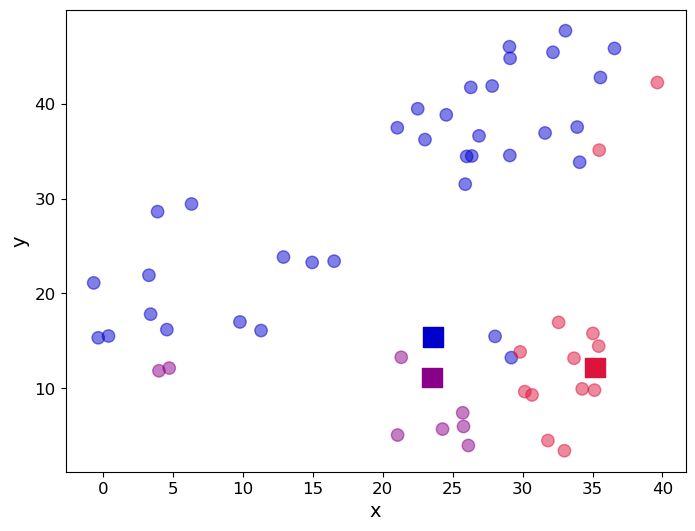

In [9]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker= 's', s= 200, c= [0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

### Tổng các sai số

In [10]:
print('The total error is {0:.2f}'.format(df['error'].sum()))

The total error is 20408.23


### Bước 5: cập nhật vị trí của k tâm bằng việc tính giá trị trung bình của các quan sát được gán cho mỗi tâm

In [11]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop= True)
centroids

,x,y
0,33.703214,15.017286
1,20.595944,30.595361
2,19.602778,8.496556


###  Xem lại biểu đồ phân tán với vị trí của k tâm đã được cập nhật

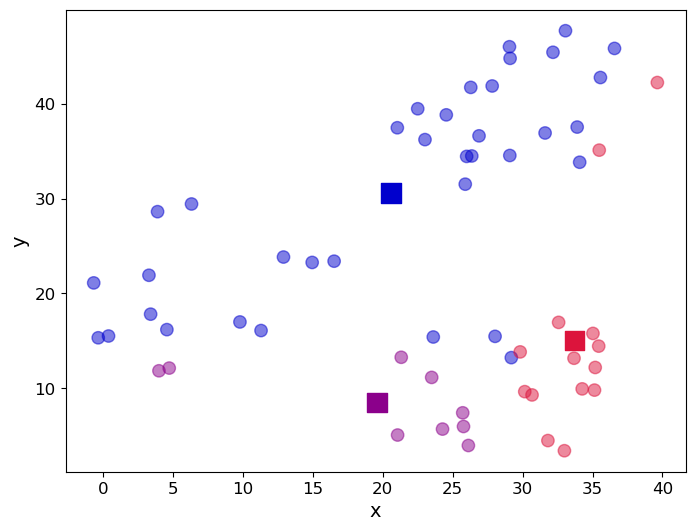

In [12]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s= 200,
            c= [0,1,2], cmap= customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

###  Bước 6: lặp lại bước 3-5

In [13]:
def kmeans(dset, k = 2, tol = 1e-4):
  '''
  K-means implementation for a
  'dset': Dataframe with observations
  'k': number of clusters, default = 2
  'tol': tolerance= 1E-4
  '''
  # Sử dụng bản copy để không làm xáo trộn lên tâp gốc
  working_dset= dset.copy()
  # Chúng ta định nghĩa 1 vào biến để giữ sai số,
  # điều kiện dừng và biến đếm cho vòng lặp
  err = []
  goahead = True
  j = 0

  # Bước 2: Tạo cụm ban đầu bằng cách định nghĩa các tâm
  centroids = intiate_centroids(k, dset)

  while(goahead):
    # Bước 3+4: Chỉnh centroids và tính sai số
    working_dset['centroid'], j_err= centroid_assignation(working_dset, centroids)
    err.append(sum(j_err))

    # Bước 5: Cập nhật vị trí tâm cụm
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop= True)

    # Bước 6: Bắt đầu lại vòng lặp
    if j>0:
      # Có sai số nào nhỏ hơn mức (1E-4)
      if err[j-1]-err[j] <= tol:
        goahead = False

    j +=1

  working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
  centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
  return working_dset['centroid'], j_err, centroids

#### Thực thi hàm trên

In [14]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmeans(df[['x','y']],3)
df.head()

,x,y,centroid,error
0,35.190,12.189,0,37.415410
1,26.288,41.718,1,16.201232
2,0.376,15.506,2,51.798518
3,26.116,3.963,0,52.187426
4,25.893,31.515,1,74.265774


#### Vị trí của các tâm cuối cùng

In [15]:
centroids

,x,y
0,29.330864,10.432318
1,29.527364,39.328909
2,6.322867,19.559800


### Xem lại biểu đồ phân tán

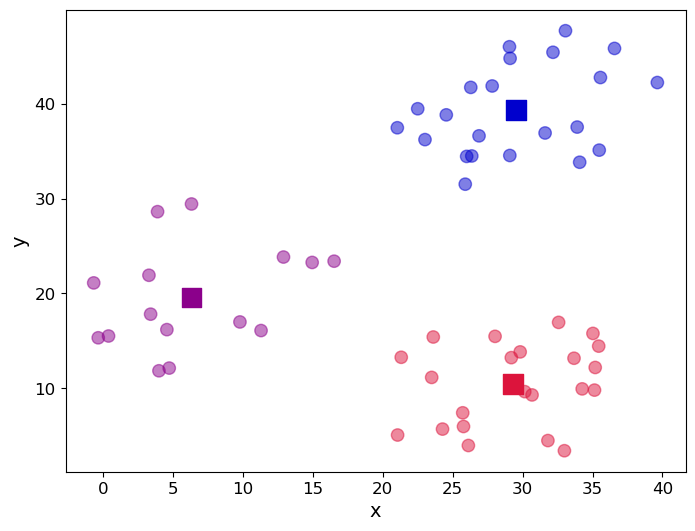

In [16]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s= 200,
            c= [0,1,2], cmap= customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

### Sử dụng “elbow” để chỉ ra số cụm tối ưu

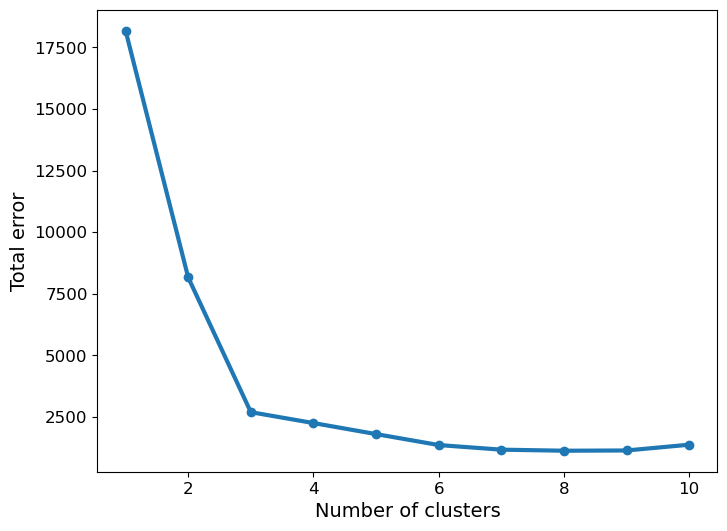

In [17]:
err_total = []
n = 10
df_elbow = blobs[['x','y']]
for i in range(n):
  _, my_errs,_ = kmeans(df_elbow, i+1)
  err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize= (8,6))
plt.plot(range(1, n+1), err_total, linewidth= 3, marker = 'o')
ax.set_xlabel(r'Number of clusters', fontsize= 14)
ax.set_ylabel(r'Total error', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.show()

# Bài 2: Thuật toán K-meadians:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [19]:
blobs = pd.read_csv('data.csv')
colnames= list(blobs.columns[1:-1])
blobs = blobs.head(59)
blobs.head()

,ID,x,y,cluster
0,1.0,35.190,12.189,1.0
1,2.0,26.288,41.718,2.0
2,3.0,0.376,15.506,0.0
3,4.0,26.116,3.963,1.0
4,5.0,25.893,31.515,2.0


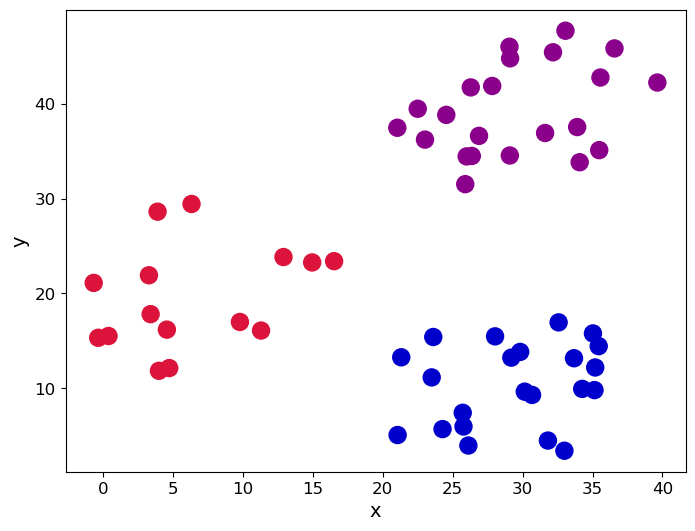

In [20]:
customcmap = ListedColormap(['crimson', 'mediumblue', 'darkmagenta'])
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(x= blobs['x'], y= blobs['y'], s= 150,
            c= blobs['cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

###  Bước 1 và 2: Xác định k và khởi tạo các tâm

In [21]:
def intiate_centroids(k, dset):
  '''
  Select k data points as centroids
  k: number of centroids
  dset: pandas dataframe
  '''
  centroids = dset.sample(k)
  return centroids

np.random.seed(42)
k = 3
df = blobs[['x','y']]
centroids = intiate_centroids(k, df)
centroids

,x,y
0,35.190,12.189
5,23.606,15.402
34,23.492,11.142


### Bước 3: tính khoảng cách

In [22]:
def rsserr(a,b):
  '''
  Calculate the total error according to the Manhattan distance
  a and b are numpy arrays
  '''
  return np.sum(np.abs(a-b))

for i, centroid in enumerate(range(centroids.shape[0])):
  err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
  print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 28.31
Error for centroid 1: 29.51
Error for centroid 2: 33.88


### Bước 4: gán giá trị các tâm

In [23]:
def centroid_assignation(dset, centroids):
  '''
  Given a dataframe 'dset' and a set of 'centroids', we assign each
  data point in 'dset' to a centroid.
  - dset - pandas dataframe with observations
  - centroids - pandas dataframe with centroids
  '''
  k = centroids.shape[0]
  n = dset.shape[0]
  assignation = []
  assign_errors = []
  for obs in range(n):
    # Estimate error (Sai số ước lượng)
    all_errors = np.array([])
    for centroid in range(k):
      err = rsserr(centroids.iloc[centroid,:], dset.iloc[obs,:])
      all_errors = np.append(all_errors, err)
    # Get the nearest centroid and the error (Lấy centroid gần nhất và error)
    nearest_centroid = np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error = np.amin(all_errors)
    # Add values to corresponding list (Thêm các giá trị vào list tương ứng)
    assignation.append(nearest_centroid)
    assign_errors.append(nearest_centroid_error)
  return assignation, assign_errors

#### Thêm cột gán tâm và sai số phát sinh để cập nhật biểu đồ phân tán biểu diễn các trọng tâm

In [24]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_19560\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,35.190,12.189,0,0.000
1,26.288,41.718,1,28.998
2,0.376,15.506,1,23.334
3,26.116,3.963,2,9.803
4,25.893,31.515,1,18.400


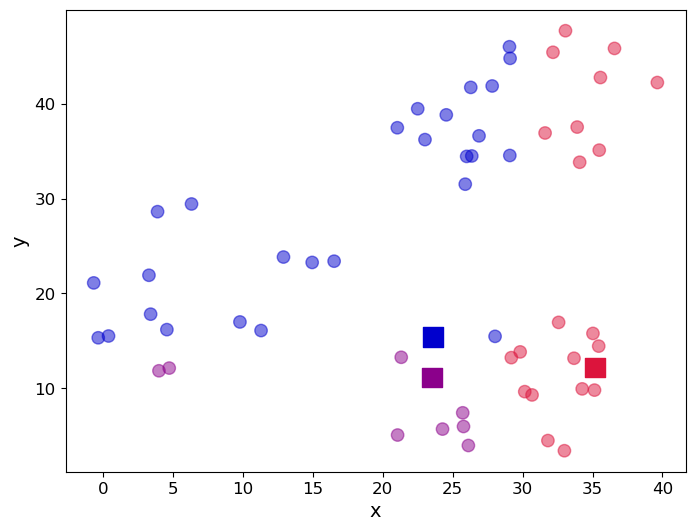

In [25]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker= 's', s= 200, c= [0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

#### Tổng các sai số

In [26]:
print('The total error is {0:.2f}'.format(df['error'].sum()))

The total error is 1061.82


### Bước 5: cập nhật vị trí của k tâm bằng việc tính giá trị trung bình của các quan sát được gán cho mỗi tâm

In [27]:
centroids = df.groupby(['centroid']).agg('median').loc[:, colnames].reset_index(drop= True)
centroids

,x,y
0,33.7860,15.109
1,21.7635,29.021
2,23.4920,7.409


####  Xem lại biểu đồ phân tán với vị trí của k tâm đã được cập nhật

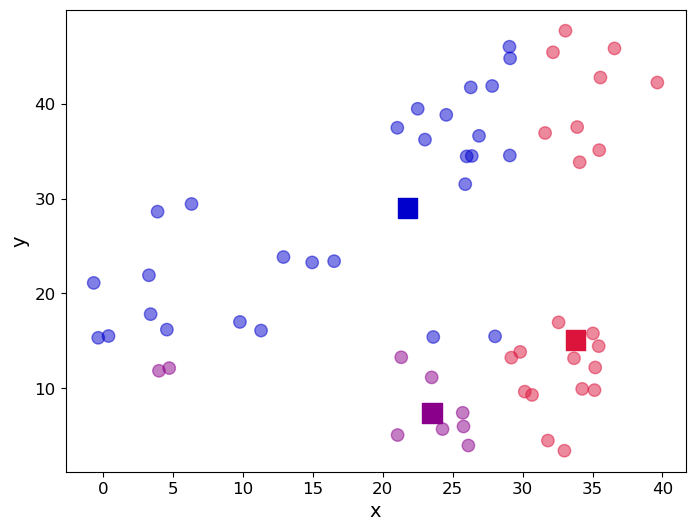

In [28]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s= 200,
            c= [0,1,2], cmap= customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

#### Bước 6: Lặp lại bước 3-5

In [29]:
def kmedians(dset, k = 2, tol = 1e-4):
  '''
  K-medians implementation for a
  'dset': Dataframe with observations
  'k': number of clusters, default = 2
  'tol': tolerance= 1E-4
  '''
  # Let us work in a copy, so we don't mess the original
  working_dset= dset.copy()
  # We define some variables to hold the error, the
  # stopping signal and a counter for the iterations
  err = []
  goahead = True
  j = 0

  # Step 2: Initiate clusters by defining centroids
  centroids = intiate_centroids(k, dset)

  while goahead:
    # Step 3+4: Assign centroids and calculate error
    working_dset['centroid'], j_err= centroid_assignation(working_dset, centroids)
    err.append(sum(j_err))

    # Step 5: Update centroid position
    centroids = working_dset.groupby('centroid').agg('median').reset_index(drop= True) # Ta đổi mean thành median

    # Step 6: Restart the iteration
    if j>0:
      # Is the error less than a tolerance (1E-4)
      if err[j-1]-err[j] <= tol:
        goahead = False

    j +=1

  working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
  centroids = working_dset.groupby('centroid').agg('median').reset_index(drop = True)
  return working_dset['centroid'], j_err, centroids

#### Thực thi hàm trên

In [30]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmedians(df[['x','y']],3)
df.head()

,x,y,centroid,error
0,35.190,12.189,0,6.8565
1,26.288,41.718,1,6.3200
2,0.376,15.506,2,6.4780
3,26.116,3.963,0,10.4435
4,25.893,31.515,1,9.8390


#### Vị trí của các tâm cuối cùng

In [31]:
centroids

,x,y
0,29.9860,10.5365
1,29.0685,38.1785
2,4.5500,17.8100


#### Xem lại biểu đồ phân tán

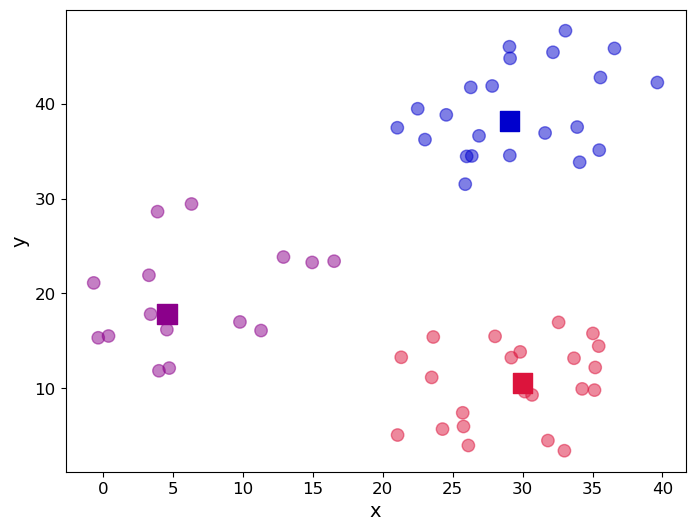

In [32]:
fig, ax = plt.subplots(figsize= (8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o',
            c= df['centroid'].astype('category'),
            cmap= customcmap, s= 80, alpha= 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s= 200,
            c= [0,1,2], cmap= customcmap)
ax.set_xlabel(r'x', fontsize= 14)
ax.set_ylabel(r'y', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

#### Sử dụng “elbow” để chỉ ra số cụm tối ưu

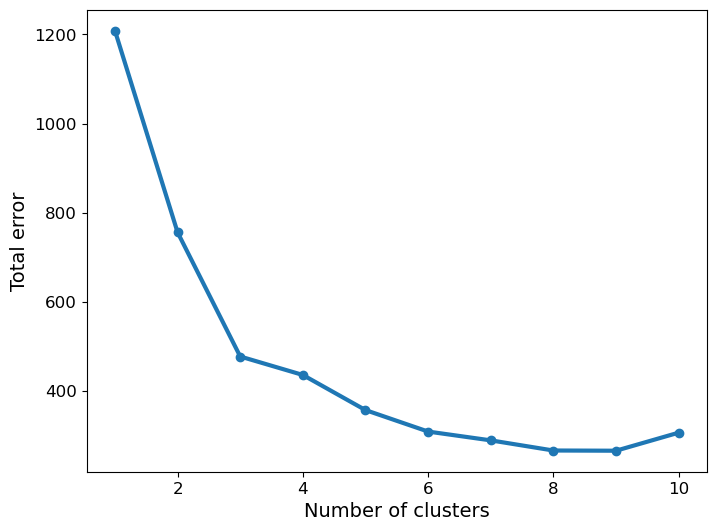

In [33]:
err_total = []
n = 10
df_elbow = blobs[['x','y']]
for i in range(n):
  _, my_errs,_ = kmedians(df_elbow, i+1)
  err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize= (8,6))
plt.plot(range(1, n+1), err_total, linewidth= 3, marker = 'o')
ax.set_xlabel(r'Number of clusters', fontsize= 14)
ax.set_ylabel(r'Total error', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.show()